# Trabajo Práctico 2 - Matrices Insumo-Producto

In [28]:
import numpy as np
import scipy.linalg as lng
import matplotlib.pyplot as plt

## Consigna 1

Sean $A$ una matriz cuadrada e $I$ la matriz identidad tales que 
$$
(I-A)^{-1} = I + A + A² + A³ + ... + A^n + ...
$$
$$
(I-A)^{-1}=I + \sum_{i=1}^{\infty} A^{i}
$$
Queremos probar que 
$$
\lim_{n \to \infty} A^{n+1} = 0
$$


### Demostración

Expresando la serie como límite, obtenemos que
$$
(I-A)^{-1}=I + \lim_{n \to \infty} \sum_{i=1}^{n} A^{i}
$$
$$
\implies (I-A)^{-1}(I-A)=(I + \lim_{n \to \infty} \sum_{i=1}^{n} A^{i})(I-A) = I
$$
$$
\implies I - A + \lim_{n \to \infty} \sum_{i=1}^{n} A^{i}(I-A) = I
$$
$$
\implies I - A + \lim_{n \to \infty} \sum_{i=1}^{n} A^{i} - A^{i+1} = I
$$
$$
\implies \lim_{n \to \infty} A - A^{2} + A^{2} - A^{3} + ... + A^{n} -A^{n+1} = A
$$
$$
\implies \lim_{n \to \infty} A - A^{n+1} = A
$$
$$
\implies A - \lim_{n \to \infty} A^{n+1} = A
$$
$$
\implies \lim_{n \to \infty} A^{n+1} = 0
$$

## Consigna 2

Usamos un for para obtener las potencias de las matrices y vamos guardando las normas usando scipy.linalg.norm. 
Experimentalmente notamos que las potencias de la matriz $A_1$ tienden a infinito, mientras que las de la matriz $A_2$ tienden a 0. 

In [45]:
A1 = np.array([
    [0.186, 0.521, 0.014, 0.32,  0.134],
    [0.24,  0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12,  0.311, 0.302, 0.208],
    [0.173, 0.03,  0.133, 0.14,  0.074],
    [0.303, 0.256, 0.323, 0.225, 0.257]
])

A2 = np.array([
    [0.186, 0.521, 0.014, 0.32,  0.134],
    [0.24,  0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12,  0.311, 0.302, 0.208],
    [0.173, 0.03,  0.133, 0.14,  0.074],
    [0.003, 0.256, 0.323, 0.225, 0.257]
])

N = 250

a1 = np.zeros(N)
a2 = np.zeros(N)
for n in range(N):
    if not (np.any(np.isinf(A1)) or np.any(np.isinf(A2))):    
        a1[n] = lng.norm(A1,2)
        a2[n] = lng.norm(A2,2)
        A1 = A1@A1
        A2 = A2@A2
    else :
        print(f"La matriz comienza a divergir en la iteración número {n}")
        break


La matriz comienza a divergir en la iteración número 65


/tmp/ipykernel_740389/969976691.py:25: RuntimeWarning: overflow encountered in matmul
  A1 = A1@A1


A continuación, graficamos los vectores $a_1$ y $a_2$ definidos de la siguiente manera: $a_1(n)= ||A_1^n||_2$, $a_2(n)= ||A_2^n||_2$.

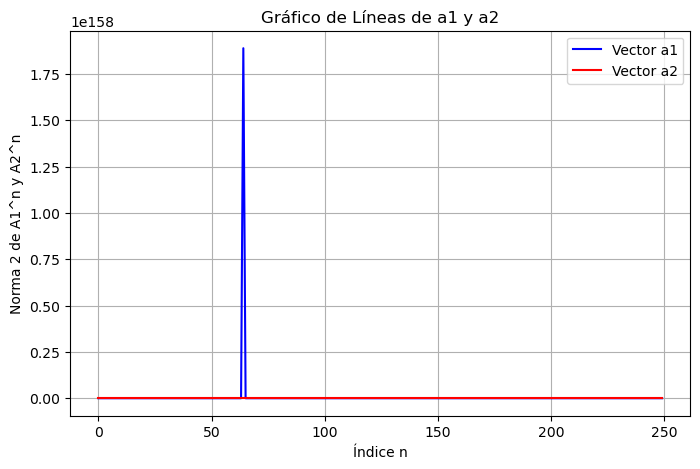

In [50]:
plt.figure(figsize=(8, 5))
# Grafico de los dos vectores
plt.plot(a1, label='Vector a1', color='blue', linestyle='-')  # Línea para a1
plt.plot(a2, label='Vector a2', color='red', linestyle='-')   # Línea para a2

plt.title('Gráfico de Líneas de a1 y a2')
plt.xlabel('Índice n')
plt.ylabel('Norma 2 de A1^n y A2^n')

plt.legend()
plt.grid(True)
plt.show()

Dado que a partir de $n=65$ la matriz $A_1$ diverge, observemos las primeras 65 coordenadas. Las matrices $A_1$ y $A_2$ tienen la misma norma en aproximadamente sus primeras 60 potencias, luego $||A_1^n||_2$ comienza a crecer exponencialmente (Todas las entradas de la potencia tienden a infinito) mientras que $||A_2^n||_2$ converge a 0 (Todas las entradas de la potencia tienden a 0).

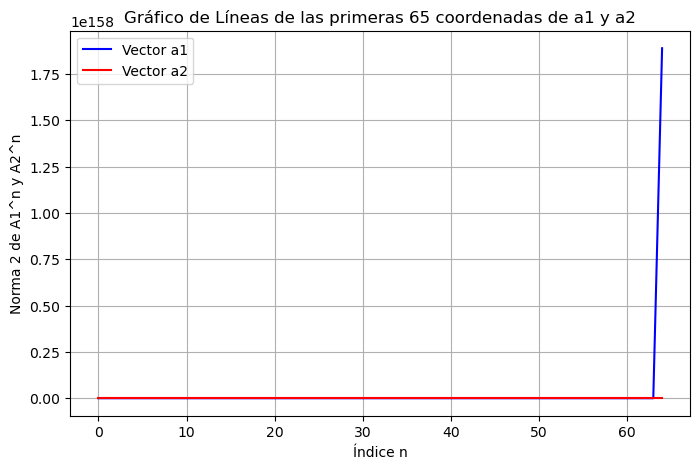

In [47]:
plt.figure(figsize=(8, 5))
# Grafico de los dos vectores
plt.plot(a1[:65], label='Vector a1', color='blue', linestyle='-')  # Línea para a1
plt.plot(a2[:65], label='Vector a2', color='red', linestyle='-')   # Línea para a2

plt.title('Gráfico de Líneas de las primeras 65 coordenadas de a1 y a2')
plt.xlabel('Índice n')
plt.ylabel('Norma 2 de A1^n y A2^n')

plt.legend()
plt.grid(True)
plt.show()

## Consigna 3